<a href="https://colab.research.google.com/github/Dywinar/dz_5_Derevo/blob/main/dz_5_Derevo_resh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets  import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import graphviz

In [79]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.29)

In [88]:
param_grid = {
    'min_samples_split': list(range(2,11)),
    'max_depth' : [1,2,3,4],
    'criterion' :['gini', 'entropy']
             }
# Параметры для наилучшего перебора
my_tree = tree.DecisionTreeClassifier()
# Находим наиболее благоприятные
grid_search = GridSearchCV(estimator=my_tree, param_grid=param_grid)
# Обучаем
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [89]:
# Наилучшая модель
final_model = grid_search.best_estimator_
final_model

DecisionTreeClassifier(max_depth=3)

Валидация

In [90]:
predict_test = final_model.predict(X_test)
predict_train = final_model.predict(X_train)
print(f'Accuracy для тестовой выборки: {accuracy_score(predict_test,y_test)}')
print(f'Accuracy для тренировочной выборки: {accuracy_score(predict_train, y_train)}')

Accuracy для тестовой выборки: 1.0
Accuracy для тренировочной выборки: 0.9622641509433962


In [ ]:
# АААААААААА 100% accuracy

Граф, как дополнение

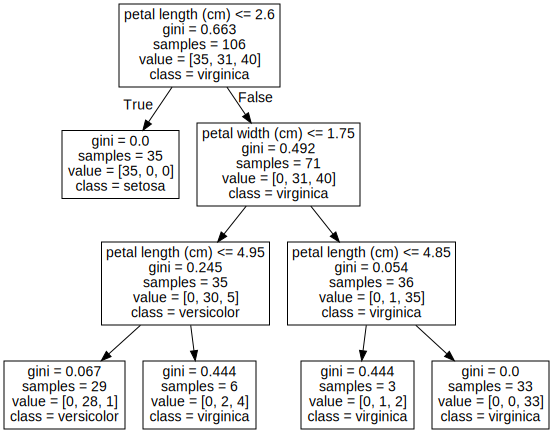

In [91]:
data = tree.export_graphviz(final_model, feature_names = iris.feature_names, class_names = iris.target_names)
graph = graphviz.Source(data)
graph